<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

### Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal wants you to

   - determine the industry factors that are most important in predicting the salary amounts for these data.

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer this question.

---

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to address the question above.

### Factors that impact salary

To predict salary the most appropriate approach would be a regression model.
Here instead we just want to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary and work with a classification model. To do so, split the salary into two groups of high and low salary, for example by choosing the median salary as a threshold (in principle you could choose any single or multiple splitting points).

Use all the skills you have learned so far to build a predictive model.
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to be able to extrapolate or predict the expected salaries for these listings.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [1]:
# imports
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import LabelEncoder

In [2]:
Indeed_url = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"
#making a request of the stated URL above:
html_text = requests.get(Indeed_url).text

In [3]:
soup = BeautifulSoup(html_text, 'html.parser') #or lmxl

In [4]:
# Using prettify makes it much easier to look through a page’s HTML coding
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script id="polyfill-script-bundle">
   /* Disable minification (remove `.min` from URL path) for more info */

(function(self, undefined) {function ArrayCreate(r){if(1/r==-Infinity&&(r=0),r>Math.pow(2,32)-1)throw new RangeError("Invalid array length");var n=[];return n.length=r,n}function Call(t,l){var n=arguments.length>2?arguments[2]:[];if(!1===IsCallable(t))throw new TypeError(Object.prototype.toString.call(t)+"is not a function.");return t.apply(l,n)}function Get(n,t){return n[t]}function HasOwnProperty(r,t){return Object.prototype.hasOwnProperty.call(r,t)}function HasProperty(n,r){return r in n}function IsArray(r){return"[object Array]"===Object.prototype.toString.call(r)}function IsCallable(n){return"function"==typeof n}function RequireObjectCoercible(e){if(null===e||e===undefined)throw TypeError();return e}function SameValueNonNumber(e,n){return e===n}funct

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 
- Decide which other components could be relevant, for example the region or the summary of the job advert.

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [5]:
results = soup.find_all('div', class_='job_seen_beacon')

In [6]:
results

[<div class="job_seen_beacon"><table cellpadding="0" cellspacing="0" class="jobCard_mainContent" role="presentation"><tbody><tr><td class="resultContent"><div class="heading4 color-text-primary singleLineTitle tapItem-gutter"><h2 class="jobTitle jobTitle-color-purple"><span title="Associate Data Scientist">Associate Data Scientist</span></h2></div><div class="heading6 company_location tapItem-gutter"><pre><span class="companyName"><a class="turnstileLink companyOverviewLink" data-tn-element="companyName" href="/cmp/AT&amp;T" rel="noopener" target="_blank">AT&amp;T</a></span><span class="ratingsDisplay withRatingLink"><a aria-label="Company rating 3.7 out of 5 stars" class="ratingLink" data-tn-variant="cmplinktst2" href="/cmp/AT&amp;T/reviews" rel="noopener" target="_blank" title="AT&amp;T reviews"><span aria-label="3.7 of stars rating" class="ratingNumber" role="img"><span aria-hidden="true">3.7</span><svg aria-hidden="true" class="starIcon" fill="none" height="12" viewbox="0 0 16 16" 

In [7]:
# soup.find('span',attrs={'class':'salary-snippet'}x)
soup.find_all('div',class_="metadata salary-snippet-container")
# soup.find_all(class_='salaryText')
# The salary is in a span with class='salaryText'.


[<div class="metadata salary-snippet-container"><span class="salary-snippet">$116,200 a year</span></div>]

In [8]:
# function to extract salaries from the search result
def extract_salary_from_result(result):
    return result.find("span", class_="salary-snippet").get_text()

In [9]:
salary = []
for result in results:
    try:
        salaries = extract_salary_from_result(result)
        salary.append(salaries)
    except:
        salaries = np.nan 
        salary.append(salaries)
        
salary

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '$116,200 a year',
 nan,
 nan,
 nan,
 nan]

In [10]:
# function to extract titles from the search result
def extract_title_from_result(result):
    return result.find(class_='jobTitle').get_text()

In [11]:
job_titles = []
for result in results:
    try:
        titles = extract_title_from_result(result)
        job_titles.append(titles)
    except:
        titles = np.nan 
        job_titles.append(titles)
        
job_titles

['Associate Data Scientist',
 'Research Scientist-Center for Data Science',
 'Data Scientist | Equities',
 'Data Scientist (Remote) - New York',
 'Data Scientist',
 'Machine Learning - Computer Vision',
 'Predictive Maintenance Data Scientist',
 'Data Scientist',
 'Business Data Scientist, Google Customer Solutions',
 'Data Scientist (Multiple Levels)',
 'Senior Data Scientist - Nationwide Opportunities',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist']

In [12]:
# function to extract locations from the search result
def extract_location_from_result(result):
    return result.find(class_='companyLocation').get_text()

In [13]:
location = []
for result in results:
    try:
        locations = extract_location_from_result(result)
        location.append(locations)
    except:
        locations = np.nan 
        location.append(locations)
        
locations

'New York, NY'

In [14]:
# function to extract companies from the search result
def extract_company_from_result(result):
    return result.find(class_='companyName').get_text()

In [15]:
company = []
for result in results:
    try:
        companies = extract_company_from_result(result)
        company.append(companies)
    except:
        companies = np.nan 
        company.append(companies)
        
companies

'Power Digital Marketing'

In [16]:
def info(Indeed_url):
    html = requests.get(Indeed_url)
    soup = BeautifulSoup(html_text, 'html.parser')
    df = pd.DataFrame(columns=["Title","Location","Company","Salary"])
    for each in soup.find_all(class_= "job_seen_beacon"):
        try: 
            title = each.find(class_='jobTitle').text.replace('\n', '')
        except:
            title = np.nan
        try:
            location = each.find('div', class_='companyLocation').text.replace('\n', '')
        except:
            location = np.nan
        try: 
            company = each.find(class_='companyName').text.replace('\n', '')
        except:
            company = np.nan
        try:    
            salary = each.find("span", class_="salary-snippet").text.replace('\n', '')
        except:
            salary = np.nan
#         synopsis = each.find('span', {'class':'summary'}).text.replace('\n', '')
        df = df.append({'Title':title, 'Location':location, 'Company':company, 'Salary':salary}, ignore_index=True)
    return df


print(info(Indeed_url))

                                                Title  \
0                            Associate Data Scientist   
1          Research Scientist-Center for Data Science   
2                           Data Scientist | Equities   
3                  Data Scientist (Remote) - New York   
4                                      Data Scientist   
5                  Machine Learning - Computer Vision   
6               Predictive Maintenance Data Scientist   
7                                      Data Scientist   
8   Business Data Scientist, Google Customer Solut...   
9                    Data Scientist (Multiple Levels)   
10   Senior Data Scientist - Nationwide Opportunities   
11                                     Data Scientist   
12                                     Data Scientist   
13                                     Data Scientist   
14                                     Data Scientist   

                                       Location                    Company  \
0        

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

In [17]:
import time
from tqdm import tqdm

In [18]:
# # url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
# url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"


# # Set this to a high-value (5000) to generate more results. 
# # Crawling more results, will also take much longer. First test your code on a small number of results and then expand.
# max_results_per_city = 50
# results = []

# df = pd.DataFrame(columns=["Title","Location","Company","Salary"])

# for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
#     'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
#     'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', 'Irvine', 'San+Jose',
#                 'Newport+Beach', 'Long+Beach', 'Manhattan+Beach', 'Long+Beach', 'San+Diego',
#                 'Remote']):
    
#     for start in tqdm(range(0, max_results_per_city, 10)):
#         # add sleep time to slow down querying
#         time.sleep(2)
#         # Grab the results from the request (as above)
#         url = url_template.format(city, start)
#         # Append to the full set of results
#         html = requests.get(Indeed_url)
#         soup = BeautifulSoup(html_text, 'html.parser')
#         for each in soup.find_all(class_= "job_seen_beacon"):
#             try: 
#                 title = each.find(class_='jobTitle').text.replace('\n', '')
#             except:
#                 title = np.nan
#             try:
#                 location = each.find('div', class_='companyLocation').text.replace('\n', '')
#             except:
#                 location = np.nan
#             try: 
#                 company = each.find(class_='companyName').text.replace('\n', '')
#             except:
#                 company = np.nan
#             try:    
#                 salary = each.find("span", class_="salary-snippet").text.replace('\n', '')
#             except:
#                 salary = np.nan
#             df = df.append({'Title':title, 'Location':location, 'Company':company, 'Salary':salary}, ignore_index=True)

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [19]:
# df.to_csv('july6_2.csv', encoding='utf-8')
# df = pd.read_csv('./july6_2.csv')

In [20]:
# df.Salary.unique()

In [21]:
# df.head(15)

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

# In the file - Data Cleaning and EDA
## Data Cleaning: http://localhost:8888/notebooks/project-4/Data%20Cleaning.ipynb
## EDA: http://localhost:8888/notebooks/project-4/EDA.ipynb

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

### Save your results as a CSV

### Load in the the data of scraped salaries

In [22]:
from pprint import pprint
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from pylab import *
import keyword

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

In [23]:
df = pd.read_csv('Indeed_Cleaned.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)

### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

#### Thought experiment: What is the baseline accuracy for this model?

In [24]:
df.Median.value_counts()

1    762
0    539
Name: Median, dtype: int64

 **Note:**
 
    - 1 is for salaries more than median
    - 0 is for salaries below median

### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

### Model Stage 1: Start by ONLY using the location as a feature

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [27]:
# dummify only city
df_city_dum = pd.get_dummies(df['City'])
df_city_dum.head()

,Bath,Belfast,Birmingham,Bristol,Cambridge,Cardiff,Edinburgh,Exeter,Glasgow,Leeds,Liverpool,London,Manchester,Newcastle,Oxford
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [28]:
# Define tatget and predicters only using the location as a feature
X = df_city_dum
y = df['Median']

In [1]:
# Standardlize the scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Classfier Model1 - RF Classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
cv_rfc = cross_val_score(rfc, X_train, y_train, cv=5)

print('Cross-validated scores:', cv_rfc)
print('Average score:', cv_rfc.mean())
print ('Trainning Score:', rfc.score(X_train, y_train))
print ('Test Score:', rfc.score(X_test, y_test))

Cross-validated scores: [0.60096154 0.60576923 0.66826923 0.59615385 0.68269231]
Average score: 0.6307692307692309
Trainning Score: 0.6615384615384615
Test Score: 0.5823754789272031


In [32]:
# Classfier Model2 - K Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
cv_knn = cross_val_score(knn, X_train, y_train, cv=5)

print('Cross-validated scores:', cv_knn)
print('Average score:', cv_knn.mean())
print ('Trainning Score:', knn.score(X_train, y_train))
print ('Test Score:', knn.score(X_test, y_test))

Cross-validated scores: [0.625      0.59134615 0.5625     0.52884615 0.5625    ]
Average score: 0.5740384615384615
Trainning Score: 0.575
Test Score: 0.5517241379310345


In [33]:
# Model3 - Support Vector Machines (SVM)
from sklearn.svm import SVC
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)
cv_svc = cross_val_score(svc, X_train, y_train, cv=5)

print('Cross-validated scores:', cv_svc)
print('Average score:', cv_svc.mean())
print ('Trainning Score:', svc.score(X_train, y_train))
print ('Test Score:', svc.score(X_test, y_test))

Cross-validated scores: [0.60096154 0.60576923 0.66826923 0.62980769 0.68269231]
Average score: 0.6375
Trainning Score: 0.6615384615384615
Test Score: 0.5823754789272031


In [34]:
# Model4 - Logisic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', random_state=1)
logreg.fit(X_train, y_train)
cv_logreg = cross_val_score(logreg, X_train, y_train, cv=5)

print('Cross-validated scores:', cv_logreg)
print('Average score:', cv_logreg.mean())
print ('Trainning Score:', logreg.score(X_train, y_train))
print ('Test Score:', logreg.score(X_test, y_test))

Cross-validated scores: [0.60096154 0.60576923 0.66826923 0.62980769 0.68269231]
Average score: 0.6375
Trainning Score: 0.6615384615384615
Test Score: 0.5823754789272031


In [35]:
# Model5 - Neural Network
import sklearn as sk
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train, y_train)
cv_NN = cross_val_score(NN, X_train, y_train, cv=5)

print('Cross-validated scores:', cv_NN)
print('Average score:', cv_NN.mean())
print ('Trainning Score:', NN.score(X_train, y_train))
print ('Test Score:', NN.score(X_test, y_test))

Cross-validated scores: [0.60576923 0.60576923 0.64903846 0.62980769 0.64423077]
Average score: 0.6269230769230768
Trainning Score: 0.6423076923076924
Test Score: 0.5632183908045977


/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [36]:
# list of strings
Model_dict = {'Random Forrest Classifier': [cv_rfc.mean(), rfc.score(X_train, y_train), rfc.score(X_test, y_test)], 
       'K Nearest Neighbors': [cv_knn.mean(), knn.score(X_train, y_train), knn.score(X_test, y_test)],
       'Support Vector Machines': [cv_svc.mean(), svc.score(X_train, y_train), svc.score(X_test, y_test)], 
       'Logistic Regression': [cv_logreg.mean(), logreg.score(X_train, y_train), logreg.score(X_test, y_test)], 
       'Neural Network': [cv_NN.mean(), NN.score(X_train, y_train), NN.score(X_test, y_test)]}
 
# Calling DataFrame constructor on list
Model_sum1 = pd.DataFrame(Model_dict, index = ['CV_score', 'Train_score', 'Test_score'])
Model_sum1.to_csv('Model_sum1.csv', encoding='utf-8')
Model_sum1 = pd.read_csv('./Model_sum1.csv')
Model_sum1
# print(Model_sum1)

,Unnamed: 0,Random Forrest Classifier,K Nearest Neighbors,Support Vector Machines,Logistic Regression,Neural Network
0,CV_score,0.630769,0.574038,0.637500,0.637500,0.626923
1,Train_score,0.661538,0.575000,0.661538,0.661538,0.642308
2,Test_score,0.582375,0.551724,0.582375,0.582375,0.563218


**>Logistic regression gave me the best accuracy score. But this is only slightly better than the baseline**

### Model Stage 2: Stage1 cols +   new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).

In [37]:
def senior(x):
    if 'Senior' in x:
        return 1
    return 0

df['Senior'] = df['Title'].apply(senior)

In [38]:
df[df.Senior != 0]

,Title,Company,City,jobs,Salary_min,Salary_max,Salary_ave,Median,Senior
11,Senior Workforce Intelligence Analyst,Cambridge University Hospitals NHS Foundation ...,Cambridge,business+intelligence,46279.10,55072.1290,55072.1290,1,1
31,Senior Business Analyst,Purplebricks,Birmingham,business+intelligence,47600.00,56644.0000,56644.0000,1,1
34,Senior applications analyst - counter terroris...,Metropolitan Police,Birmingham,business+intelligence,51517.48,61305.8012,61305.8012,1,1
53,Senior Management Information Analyst – MI - D...,Douglas Jackson,Liverpool,business+intelligence,47600.00,56644.0000,56644.0000,1,1
60,Senior Business Analyst - Band 6,Royal United Hospitals Bath NHS Foundation Trust,Bristol,business+intelligence,37324.35,44415.9765,44415.9765,0,1
...,...,...,...,...,...,...,...,...,...
1276,"Senior Database Administrator (PostgreSQL, Ora...",Linux Recruit,London,database+administrator,83300.00,99127.0000,99127.0000,1,1
1278,Senior Database Administrator,EV Cargo Technology,London,database+administrator,77350.00,92046.5000,92046.5000,1,1
1285,"Senior Manager, Data and Statistics",Bank of England,London,database+administrator,89250.00,106207.5000,106207.5000,1,1
1286,Employment Tax Senior Analyst,Accenture,London,database+administrator,41650.00,49563.5000,49563.5000,1,1


In [39]:
def manager(x):
    if 'Manager' in x:
        return 1
    return 0

df['Manager'] = df['Title'].apply(manager)

In [40]:
df[df.Manager != 0]

,Title,Company,City,jobs,Salary_min,Salary_max,Salary_ave,Median,Senior,Manager
24,Business Intelligence Manager,Dignity Funerals,Birmingham,business+intelligence,71400.00,84966.0000,84966.0000,1,0,1
32,Market Intelligence Manager,University of Wolverhampton,Birmingham,business+intelligence,42654.36,50758.6884,50758.6884,1,0,1
41,"Intelligence Manager, Crime Development Team",UK Government - Home Office,Liverpool,business+intelligence,36672.23,43639.9537,43639.9537,0,0,1
51,Data and Performance Manager (Building Services),Magenta Living,Liverpool,business+intelligence,48106.94,57247.2586,57247.2586,1,0,1
78,Business Intelligence and Reporting Manager,PA Housing,London,business+intelligence,59500.00,70805.0000,70805.0000,1,0,1
80,Business Intelligence & Reporting Manager,iSmash,London,business+intelligence,45220.00,53811.8000,53811.8000,1,0,1
89,Business Development Manager – Pharmaceutical ...,Optimal Search,London,business+intelligence,89250.00,106207.5000,106207.5000,1,0,1
99,Senior Manager Business Intelligence,Harnham,London,business+intelligence,71400.00,84966.0000,84966.0000,1,1,1
101,Business Development Manager – NHS Business In...,Optimal Search,London,business+intelligence,53550.00,63724.5000,63724.5000,1,0,1
153,Systems Analyst & Integration Manager,Dakota Hotels Manchester,Manchester,business+intelligence,38675.00,46023.2500,46023.2500,0,0,1


In [41]:
def entry(x):
    if 'Entry' in x:
        return 1
    return 0

df['Entry'] = df['Title'].apply(entry)

def junior(x):
    if 'Junior' in x:
        return 1
    return 0

df['Entry'] = df['Title'].apply(junior)

def engineer(x):
    if 'Engineer' in x:
        return 1
    return 0

df['Engineer'] = df['Title'].apply(engineer)

def data_all(x):
    if 'Data' in x:
        return 1
    return 0
df['Data'] = df['Title'].apply(data_all)


def scientist(x):
    if 'Scientist' in x:
        return 1
    return 0
df['Scientist'] = df['Title'].apply(scientist)


def analyst(x):
    if 'Analyst' in x:
        return 1
    return 0
df['Analyst'] = df['Title'].apply(analyst)


def consultant(x):
    if 'Consultant' in x:
        return 1
    return 0
df['Consultant'] = df['Title'].apply(consultant)

def intern(x):
    if 'Intern' in x:
        return 1
    return 0
df['Intern'] = df['Title'].apply(intern)


def contract(x):
    if 'Contract' in x:
        return 1
    return 0

df['Contract'] = df['Title'].apply(contract)

def machine_learning(x):
    if 'Machine Learning' in x:
        return 1
    return 0

df['Machine Learning'] = df['Title'].apply(machine_learning)

def ml(x):
    if 'ML' in x:
        return 1
    return 0
df['ML'] = df['Title'].apply(ml)

def data_analyst(x):
    if 'Data Analyst' in x:
        return 1
    return 0
df['Data Analyst'] = df['Title'].apply(data_analyst)


def data_scientist(x):
    if 'Data Scientist' in x:
        return 1
    return 0
df['Data Scientist'] = df['Title'].apply(data_scientist)

In [42]:
df.columns

Index(['Title', 'Company', 'City', 'jobs', 'Salary_min', 'Salary_max',
       'Salary_ave', 'Median', 'Senior', 'Manager', 'Entry', 'Engineer',
       'Data', 'Scientist', 'Analyst', 'Consultant', 'Intern', 'Contract',
       'Machine Learning', 'ML', 'Data Analyst', 'Data Scientist'],
      dtype='object')

In [43]:
feature_matrix = df.copy()
feature_matrix.drop(['Title', 'Company', 'City', 
                     'jobs', 'Salary_min', 'Salary_max',
                     'Salary_ave', 'Median'], 
                    axis=1, 
                    inplace=True)


print(feature_matrix.shape)
feature_matrix

(1301, 14)


,Senior,Manager,Entry,Engineer,Data,Scientist,Analyst,Consultant,Intern,Contract,Machine Learning,ML,Data Analyst,Data Scientist
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1297,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1298,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1299,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [50]:
# Standardlize the scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_dum = pd.concat([df_city_dum, feature_matrix], axis=1)
y = df['Median']
# X_dum = scaler.fit_transform(X_dum)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dum, 
                                                    y, 
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 1)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Classfier Model1 - RF Classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
cv_rfc = cross_val_score(rfc, X_train, y_train, cv=5)

print('Cross-validated scores:', cv_rfc)
print('Average score:', cv_rfc.mean())
print ('Trainning Score:', rfc.score(X_train, y_train))
print ('Test Score:', rfc.score(X_test, y_test))


# Classfier Model2 - K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
cv_knn = cross_val_score(knn, X_train, y_train, cv=5)
print('---------------------------------------------')
print('Cross-validated scores:', cv_knn)
print('Average score:', cv_knn.mean())
print ('Trainning Score:', knn.score(X_train, y_train))
print ('Test Score:', knn.score(X_test, y_test))


# Model3 - Support Vector Machines (SVM)
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
cv_svc = cross_val_score(svc, X_train, y_train, cv=5)
print('---------------------------------------------')
print('Cross-validated scores:', cv_svc)
print('Average score:', cv_svc.mean())
print ('Trainning Score:', svc.score(X_train, y_train))
print ('Test Score:', svc.score(X_test, y_test))


# Model4 - Logisic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', random_state=1)
logreg.fit(X_train, y_train)
cv_logreg = cross_val_score(logreg, X_train, y_train, cv=5)
print('---------------------------------------------')
print('Cross-validated scores:', cv_logreg)
print('Average score:', cv_logreg.mean())
print ('Trainning Score:', logreg.score(X_train, y_train))
print ('Test Score:', logreg.score(X_test, y_test))


# Model4 - Logisic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', random_state=1)
logreg.fit(X_train, y_train)
cv_logreg = cross_val_score(logreg, X_train, y_train, cv=5)
print('---------------------------------------------')
print('Cross-validated scores:', cv_logreg)
print('Average score:', cv_logreg.mean())
print ('Trainning Score:', logreg.score(X_train, y_train))
print ('Test Score:', logreg.score(X_test, y_test))


# Model5 - Neural Network
import sklearn as sk
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train, y_train)
cv_NN = cross_val_score(NN, X_train, y_train, cv=5)
print('---------------------------------------------')
print('Cross-validated scores:', cv_NN)
print('Average score:', cv_NN.mean())
print ('Trainning Score:', NN.score(X_train, y_train))
print ('Test Score:', NN.score(X_test, y_test))

Cross-validated scores: [0.69711538 0.65865385 0.6875     0.69230769 0.69711538]
Average score: 0.6865384615384615
Trainning Score: 0.7865384615384615
Test Score: 0.6398467432950191
---------------------------------------------
Cross-validated scores: [0.69711538 0.67307692 0.65865385 0.65865385 0.64423077]
Average score: 0.6663461538461538
Trainning Score: 0.75
Test Score: 0.6360153256704981
---------------------------------------------
Cross-validated scores: [0.72115385 0.65384615 0.69230769 0.66826923 0.68269231]
Average score: 0.6836538461538462
Trainning Score: 0.7096153846153846
Test Score: 0.6513409961685823
---------------------------------------------
Cross-validated scores: [0.71153846 0.6875     0.72596154 0.69230769 0.70673077]
Average score: 0.7048076923076924
Trainning Score: 0.7134615384615385
Test Score: 0.6398467432950191
---------------------------------------------
Cross-validated scores: [0.71153846 0.6875     0.72596154 0.69230769 0.70673077]
Average score: 0.7048

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

---------------------------------------------
Cross-validated scores: [0.68269231 0.67788462 0.69711538 0.66826923 0.73076923]
Average score: 0.6913461538461538
Trainning Score: 0.775
Test Score: 0.6628352490421456


/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [53]:
# list of strings
Model_dict2 = {'Random Forrest Classifier': [cv_rfc.mean(), rfc.score(X_train, y_train), rfc.score(X_test, y_test)], 
       'K Nearest Neighbors': [cv_knn.mean(), knn.score(X_train, y_train), knn.score(X_test, y_test)],
       'Support Vector Machines': [cv_svc.mean(), svc.score(X_train, y_train), svc.score(X_test, y_test)], 
       'Logistic Regression': [cv_logreg.mean(), logreg.score(X_train, y_train), logreg.score(X_test, y_test)], 
       'Neural Network': [cv_NN.mean(), NN.score(X_train, y_train), NN.score(X_test, y_test)]}
 
# Calling DataFrame constructor on list
Model_sum2 = pd.DataFrame(Model_dict2, index = ['CV_score', 'Train_score', 'Test_score'])
Model_sum2.to_csv('Model_sum2.csv', encoding='utf-8')
Model_sum2 = pd.read_csv('./Model_sum2.csv')
Model_sum2

,Unnamed: 0,Random Forrest Classifier,K Nearest Neighbors,Support Vector Machines,Logistic Regression,Neural Network
0,CV_score,0.686538,0.666346,0.683654,0.704808,0.691346
1,Train_score,0.786538,0.750000,0.709615,0.713462,0.775000
2,Test_score,0.639847,0.636015,0.651341,0.639847,0.662835


## Model Stage 3 (Optional): Adding NLP Features

#### Trying with NLP (Count vectorizer)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', max_features=30, ngram_range=(2,2))
vectorizers = cvec.fit_transform(df['Title'].values)

vec  = pd.DataFrame(vectorizers.todense(), columns=cvec.get_feature_names())
print (vec.shape)
vec.head()

(1301, 30)


,analyst data,artificial intelligence,bi analyst,biomedical scientist,business analyst,business intelligence,data analyst,data analytics,data engineer,data science,...,performance analyst,reporting analyst,research associate,research scientist,risk analyst,senior business,senior data,software engineer,support analyst,systems analyst
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Standardlize the scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_cvec = pd.concat([vec, df_city_dum], axis=1)
y = df['Median']
# X_cvec = scaler.fit_transform(X_cvec)


# # Train Test
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_cvec, 
#                                                     y, 
#                                                     test_size = 0.2,
#                                                     stratify = y,
#                                                     random_state = 1)

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

Cross-validated scores: [0.68663594 0.7235023  0.60829493 0.6359447  0.65898618 0.68981481]
Average score: 0.6671964783523924
Standard deviation of score: 0.03780057982466208
0.7878554957724827


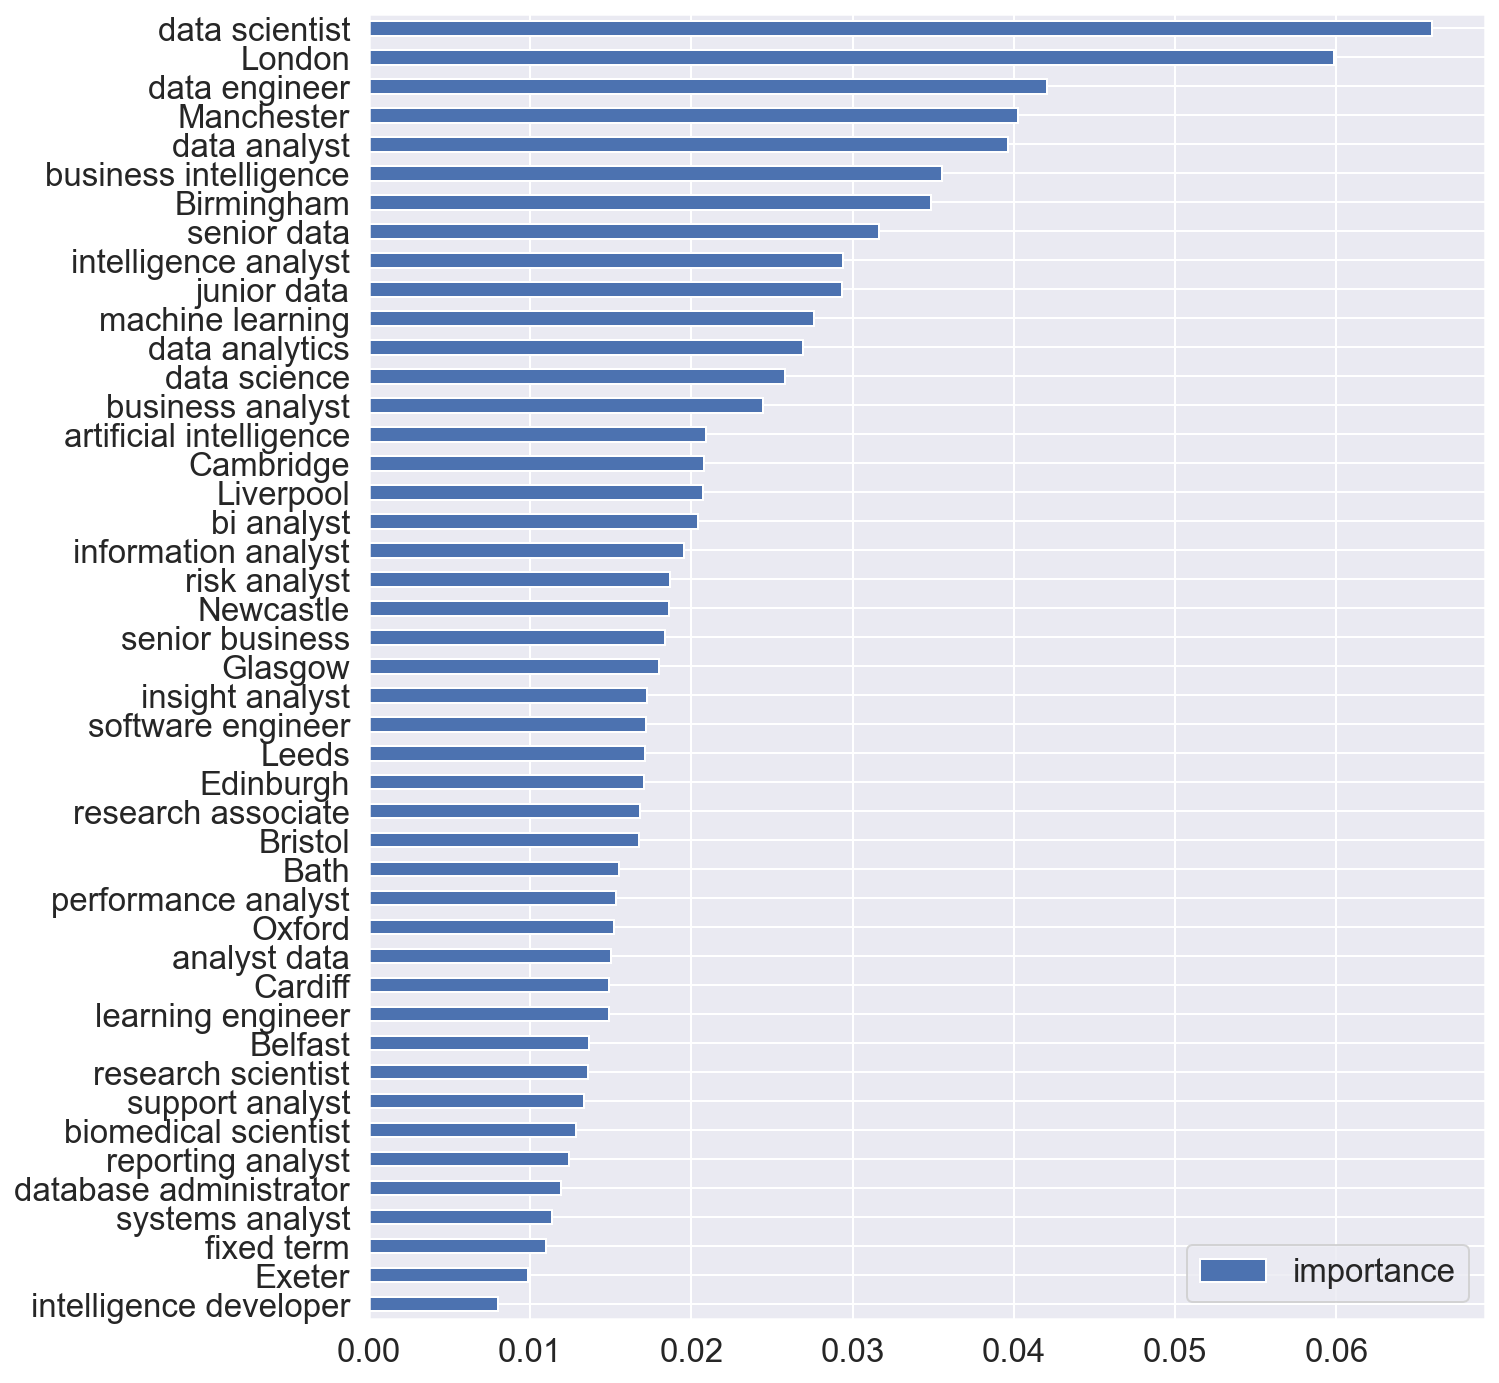

In [56]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_cvec, y)

cv = cross_val_score(rfc, X_cvec, y, cv=6)
print('Cross-validated scores:', cv)
print('Average score:', cv.mean())
print('Standard deviation of score:', cv.std())
print (rfc.score(X_cvec,y))


importance_vec = pd.DataFrame(rfc.feature_importances_, 
                                    index = X_cvec.columns, 
                                    columns=['importance']).sort_values('importance', ascending=True)

importance_vec.plot(kind='barh', figsize=(10, 12))
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cvec, 
                                                    y, 
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 1)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Classfier Model1 - RF Classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
cv_rfc = cross_val_score(rfc, X_train, y_train, cv=5)

print('Cross-validated scores:', cv_rfc)
print('Average score:', cv_rfc.mean())
print ('Trainning Score:', rfc.score(X_train, y_train))
print ('Test Score:', rfc.score(X_test, y_test))


# Classfier Model2 - K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
cv_knn = cross_val_score(knn, X_train, y_train, cv=5)
print('---------------------------------------------')
print('Cross-validated scores:', cv_knn)
print('Average score:', cv_knn.mean())
print ('Trainning Score:', knn.score(X_train, y_train))
print ('Test Score:', knn.score(X_test, y_test))


# Model3 - Support Vector Machines (SVM)
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
cv_svc = cross_val_score(svc, X_train, y_train, cv=5)
print('---------------------------------------------')
print('Cross-validated scores:', cv_svc)
print('Average score:', cv_svc.mean())
print ('Trainning Score:', svc.score(X_train, y_train))
print ('Test Score:', svc.score(X_test, y_test))


# Model4 - Logisic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', random_state=1)
logreg.fit(X_train, y_train)
cv_logreg = cross_val_score(logreg, X_train, y_train, cv=5)
print('---------------------------------------------')
print('Cross-validated scores:', cv_logreg)
print('Average score:', cv_logreg.mean())
print ('Trainning Score:', logreg.score(X_train, y_train))
print ('Test Score:', logreg.score(X_test, y_test))


# Model4 - Logisic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', random_state=1)
logreg.fit(X_train, y_train)
cv_logreg = cross_val_score(logreg, X_train, y_train, cv=5)
print('---------------------------------------------')
print('Cross-validated scores:', cv_logreg)
print('Average score:', cv_logreg.mean())
print ('Trainning Score:', logreg.score(X_train, y_train))
print ('Test Score:', logreg.score(X_test, y_test))


# Model5 - Neural Network
import sklearn as sk
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train, y_train)
cv_NN = cross_val_score(NN, X_train, y_train, cv=5)
print('---------------------------------------------')
print('Cross-validated scores:', cv_NN)
print('Average score:', cv_NN.mean())
print ('Trainning Score:', NN.score(X_train, y_train))
print ('Test Score:', NN.score(X_test, y_test))

Cross-validated scores: [0.71634615 0.65384615 0.66826923 0.67307692 0.69711538]
Average score: 0.6817307692307693
Trainning Score: 0.8
Test Score: 0.6743295019157088
---------------------------------------------
Cross-validated scores: [0.69230769 0.63942308 0.66346154 0.65865385 0.65384615]
Average score: 0.6615384615384615
Trainning Score: 0.7413461538461539
Test Score: 0.6168582375478927
---------------------------------------------
Cross-validated scores: [0.68269231 0.62019231 0.69230769 0.67307692 0.67788462]
Average score: 0.6692307692307693
Trainning Score: 0.7153846153846154
Test Score: 0.6130268199233716
---------------------------------------------
Cross-validated scores: [0.6875     0.64903846 0.71153846 0.70673077 0.65865385]
Average score: 0.6826923076923077
Trainning Score: 0.7115384615384616
Test Score: 0.6168582375478927
---------------------------------------------
Cross-validated scores: [0.6875     0.64903846 0.71153846 0.70673077 0.65865385]
Average score: 0.68269

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

---------------------------------------------
Cross-validated scores: [0.66826923 0.64903846 0.67307692 0.68269231 0.70192308]
Average score: 0.675
Trainning Score: 0.7759615384615385
Test Score: 0.6360153256704981


In [58]:
# list of strings
Model_dict3 = {'Random Forrest Classifier': [cv_rfc.mean(), rfc.score(X_train, y_train), rfc.score(X_test, y_test)], 
       'K Nearest Neighbors': [cv_knn.mean(), knn.score(X_train, y_train), knn.score(X_test, y_test)],
       'Support Vector Machines': [cv_svc.mean(), svc.score(X_train, y_train), svc.score(X_test, y_test)], 
       'Logistic Regression': [cv_logreg.mean(), logreg.score(X_train, y_train), logreg.score(X_test, y_test)], 
       'Neural Network': [cv_NN.mean(), NN.score(X_train, y_train), NN.score(X_test, y_test)]}
 
# Calling DataFrame constructor on list
Model_sum3 = pd.DataFrame(Model_dict3, index = ['CV_score', 'Train_score', 'Test_score'])
Model_sum3.to_csv('Model_sum3.csv', encoding='utf-8')
Model_sum3 = pd.read_csv('./Model_sum3.csv')
Model_sum3

,Unnamed: 0,Random Forrest Classifier,K Nearest Neighbors,Support Vector Machines,Logistic Regression,Neural Network
0,CV_score,0.681731,0.661538,0.669231,0.682692,0.675000
1,Train_score,0.800000,0.741346,0.715385,0.711538,0.775962
2,Test_score,0.674330,0.616858,0.613027,0.616858,0.636015


## Compare the transformation of the models in each step

In [59]:
Model_sum1

,Unnamed: 0,Random Forrest Classifier,K Nearest Neighbors,Support Vector Machines,Logistic Regression,Neural Network
0,CV_score,0.630769,0.574038,0.637500,0.637500,0.626923
1,Train_score,0.661538,0.575000,0.661538,0.661538,0.642308
2,Test_score,0.582375,0.551724,0.582375,0.582375,0.563218


In [60]:
Model_sum2

,Unnamed: 0,Random Forrest Classifier,K Nearest Neighbors,Support Vector Machines,Logistic Regression,Neural Network
0,CV_score,0.686538,0.666346,0.683654,0.704808,0.691346
1,Train_score,0.786538,0.750000,0.709615,0.713462,0.775000
2,Test_score,0.639847,0.636015,0.651341,0.639847,0.662835


In [61]:
Model_sum3

,Unnamed: 0,Random Forrest Classifier,K Nearest Neighbors,Support Vector Machines,Logistic Regression,Neural Network
0,CV_score,0.681731,0.661538,0.669231,0.682692,0.675000
1,Train_score,0.800000,0.741346,0.715385,0.711538,0.775962
2,Test_score,0.674330,0.616858,0.613027,0.616858,0.636015


## Observation of Stage1, 2, 3 Models
- Overall, Random Forest Classifier had better CV and accuracy scores over other models in any of the stages I went through. 
- Adding additional features to categorize common terms by creating new cols with Python functions and also using NLP improved all the model scores overall
### Works can be done to improve the scores further
- Using different models or boosting classifiers could give higher scores
- Using different scaling methods such as MinMaxScaler can potentially improve the model scores
- With Grid Search, there'll be possibilities to improve all the model scores (Go to next section)

## Additional Works (Works can be done to improve the scores further)

In [62]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_cvec, y)
cv = cross_val_score(gbc, X_cvec, y, cv=5)

print('Cross-validated scores:', cv)
print('Average score:', cv.mean())
print('Standard deviation of score:', cv.std())
print ('Model Score:', gbc.score(X_cvec,y))

Cross-validated scores: [0.67049808 0.64615385 0.54230769 0.67692308 0.66153846]
Average score: 0.639484232242853
Standard deviation of score: 0.049674296780489624
Model Score: 0.6956187548039969


In [63]:
base_estimator = DecisionTreeClassifier(max_depth=3, max_features=0.3)

ada = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=100,
                           random_state=1)
ada.fit(X_cvec, y)
cv = cross_val_score(ada, X_cvec, y, cv=5)

print('Cross-validated scores:', cv)
print('Average score:', cv.mean())
print('Standard deviation of score:', cv.std())
print ('Model Score:', ada.score(X_cvec,y))

Cross-validated scores: [0.70881226 0.66153846 0.55769231 0.63461538 0.64230769]
Average score: 0.6409932213380489
Standard deviation of score: 0.04899586885051873
Model Score: 0.787086856264412


## Pipeline

In [66]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier


# Standardlize the scaling
from sklearn.preprocessing import StandardScaler

# Scaling by MinMax
scaler_minmax = MinMaxScaler()

# # Scaling by Poly
# scaler_poly = PolynomialFeatures()
# X_sp = = scaler_poly.fit_transform(X)

X_cvec = pd.concat([vec, df_city_dum], axis=1)
y = df['Median']

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cvec, 
                                                    y, 
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 1)

X_train = scaler_minmax.fit_transform(X_train)
X_test = scaler_minmax.transform(X_test)

In [67]:
# Models
logreg = LogisticRegression(solver='lbfgs', random_state=1)
tree = DecisionTreeClassifier()
knn = knn = KNeighborsClassifier(n_neighbors=5)

pipe_min_logreg = Pipeline(steps=[('scaler', scaler_minmax),
                       ('Model1', logreg)])
pipe_min_tree = Pipeline(steps=[('scaler', scaler_minmax),
                       ('Model1', tree)])
pipe_min_knn = Pipeline(steps=[('scaler', scaler_minmax),
                       ('Model1', knn)])

In [68]:
from sklearn import set_config
set_config(display='diagram')   
# diplays HTML representation in a jupyter context
pipe_min_logreg.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('Model1', LogisticRegression(random_state=1))])

In [69]:
pipe_min_tree.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('Model1', DecisionTreeClassifier())])

In [70]:
pipe_min_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('Model1', KNeighborsClassifier())])

In [71]:
print('Min x Logleg - CV, Train, Test')
print(cross_val_score(pipe_min_logreg, X_train, y_train, cv=5).mean())
print(pipe_min_logreg.score(X_train, y_train))
print(pipe_min_logreg.score(X_test, y_test))
print('-----------------------------')
print('Min x Tree - CV, Train, Test')
print(cross_val_score(pipe_min_tree, X_train, y_train, cv=5).mean())
print(pipe_min_tree.score(X_train, y_train))
print(pipe_min_tree.score(X_test, y_test))
print('-----------------------------')
print('Min x Knn - CV, Train, Test')
print(cross_val_score(pipe_min_knn, X_train, y_train, cv=5).mean())
print(pipe_min_knn.score(X_train, y_train))
print(pipe_min_knn.score(X_test, y_test))

Min x Logleg - CV, Train, Test
0.6788461538461539
0.7144230769230769
0.6245210727969349
-----------------------------
Min x Tree - CV, Train, Test
0.6740384615384615
0.8
0.6590038314176245
-----------------------------
Min x Knn - CV, Train, Test
0.6375
0.7346153846153847
0.6551724137931034


In [72]:
# # Scaling by Poly
# scaler_poly = PolynomialFeatures()
# X_sp = scaler_poly.fit_transform(X)

# X_cvec = pd.concat([vec, df_city_dum], axis=1)
# y = df['Median']
# X_sp = scaler_poly.fit_transform(X_cvec)



# # Train Test Split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_cvec, 
#                                                     y, 
#                                                     test_size = 0.2,
#                                                     stratify = y,
#                                                     random_state = 1)

# X_train = scaler_poly.fit_transform(X_train)
# X_test = scaler_poly.transform(X_test)

### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs.


- Use cross-validation to evaluate your models.
- Evaluate the accuracy, AUC, precision and recall of the models.
- Plot the ROC and precision-recall curves for at least one of your models.

#### Grid search for AdaBoost

In [73]:
list(ada.get_params().keys())

['algorithm',
 'base_estimator__ccp_alpha',
 'base_estimator__class_weight',
 'base_estimator__criterion',
 'base_estimator__max_depth',
 'base_estimator__max_features',
 'base_estimator__max_leaf_nodes',
 'base_estimator__min_impurity_decrease',
 'base_estimator__min_impurity_split',
 'base_estimator__min_samples_leaf',
 'base_estimator__min_samples_split',
 'base_estimator__min_weight_fraction_leaf',
 'base_estimator__random_state',
 'base_estimator__splitter',
 'base_estimator',
 'learning_rate',
 'n_estimators',
 'random_state']

In [74]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param = {
 'n_estimators': [100, 110, 120, 130, 140],
 'learning_rate' : [0.009,0.01, 0.011],
 'loss' : ['linear', 'square', 'exponential']
 }

gs_ada = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param,
 cv=5,
 n_iter = 10,
 n_jobs=-1)

gs_ada.fit(X_cvec, y)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.009, 0.01, 0.011],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [100, 110, 120, 130,
                                                         140]})

In [75]:
print(gs_ada.best_score_)
print(gs_ada.best_estimator_)
print(gs_ada.best_params_)


# Evaluate how much iprovement can be made with the insight from grid search
print('gs Score:', gs_ada.score(X, y))

0.04755027686410336
AdaBoostRegressor(learning_rate=0.011, loss='square', n_estimators=110)
{'n_estimators': 110, 'loss': 'square', 'learning_rate': 0.011}


ValueError: X has 15 features, but DecisionTreeRegressor is expecting 45 features as input.

#### Grid search for KNN

In [76]:
list(knn.get_params().keys())

['algorithm',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'p',
 'weights']

In [77]:
params = {'n_neighbors': [10,20,30,40,50],
          'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan','minkowski']}

gs_knn = GridSearchCV(estimator=knn,
                  param_grid=params,
                  verbose = 1,
                  cv=5,
                  n_jobs = -1)

gs_knn.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [10, 20, 30, 40, 50],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [78]:
print(gs_knn.best_score_)
print(gs_knn.score(X, y))
print(gs_knn.best_estimator_)
print(gs_knn.best_params_)


0.6149425287356322
0.6487317448116833
KNeighborsClassifier(metric='euclidean', n_neighbors=40, weights='distance')
{'metric': 'euclidean', 'n_neighbors': 40, 'weights': 'distance'}


In [79]:
# Based on Grid search
knn = KNeighborsClassifier(n_neighbors=20,
                          weights='distance',
                          metric='manhattan')
knn.fit(X, y)
cv = cross_val_score(knn, X, y, cv=5)

print('Cross-validated scores:', cv)
print('Average score:', cv.mean())
print('Standard deviation of score:', cv.std())
print('Model Score:', knn.score(X, y))

Cross-validated scores: [0.58237548 0.52307692 0.54615385 0.71538462 0.64615385]
Average score: 0.6026289419392867
Standard deviation of score: 0.0700520122395218
Model Score: 0.6456571867794004


#### Grid search for RF Classifier

In [80]:
# list(rfc.get_params().keys())

In [81]:
# params = {'bootstrap': [True, False],
#           'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#           'max_features': ['auto', 'sqrt'],
#           'min_samples_leaf': [1, 2, 4],
#           'min_samples_split': [2, 5, 10],
#           'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# gs_rf = GridSearchCV(estimator=rfc,
#                   param_grid=params,
#                   cv = 5, 
#                   verbose=2, 
#                   n_jobs = -1)

# gs_rf.fit(X,y)

In [82]:
# print(gs_rf.best_score_)
# print(gs_rf.best_estimator_)
# print(gs_rf.best_params_)

## Model Evaluation with KNN

### Confusion Matrix

In [83]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(gs_knn.classes_)))
from sklearn.metrics import classification_report, confusion_matrix

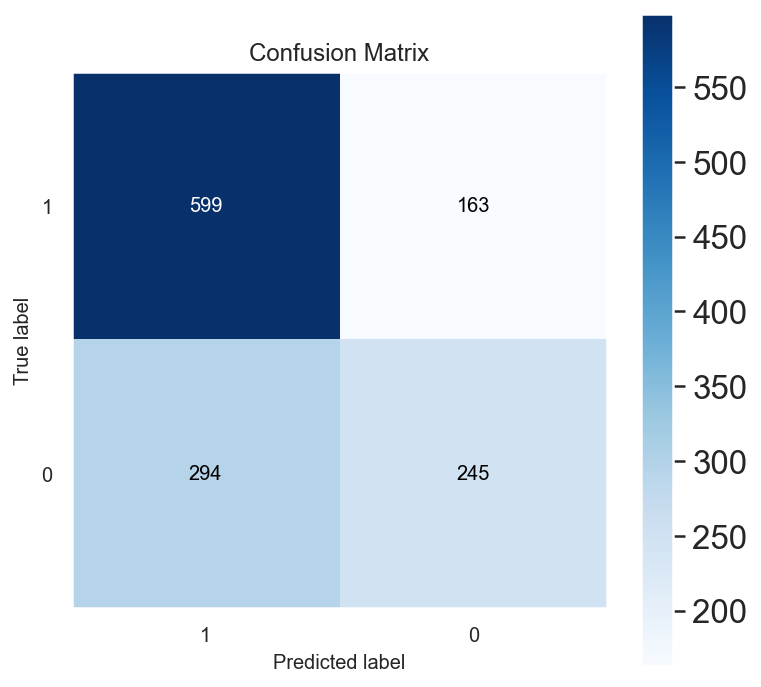

In [84]:
predictions = gs_knn.predict(X)
skplt.metrics.plot_confusion_matrix(y, predictions, labels=[1, 0], figsize=(6,6))
plt.show()

### Classification report

In [85]:
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.60      0.45      0.52       539
           1       0.67      0.79      0.72       762

    accuracy                           0.65      1301
   macro avg       0.64      0.62      0.62      1301
weighted avg       0.64      0.65      0.64      1301



### Precision-recall and ROC curve

#### Precision-recall and ROC curve with KNN

In [86]:
# Precision Recall
skplt.metrics.plot_precision_recall(y, probabilities, cmap=cmap)
plt.show()

NameError: name 'probabilities' is not defined

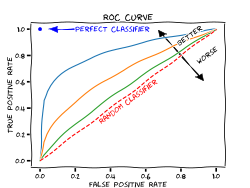

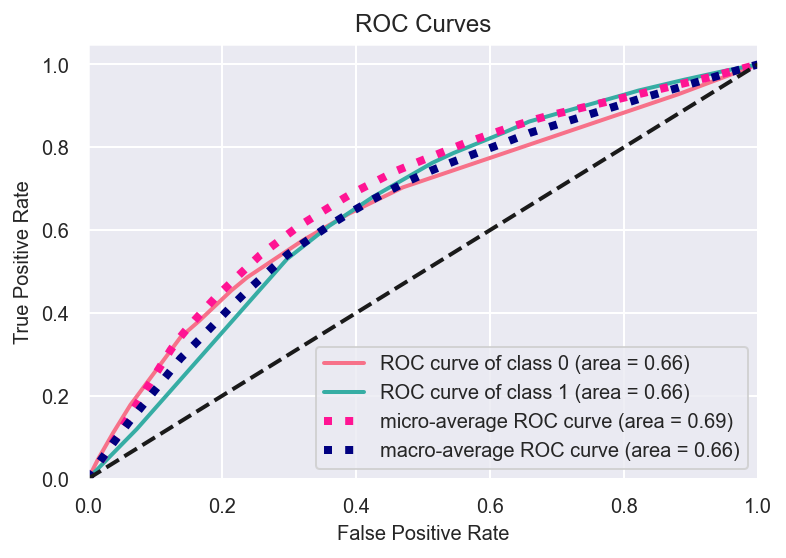

In [87]:
# ROC
probabilities = gs_knn.predict_proba(X)
skplt.metrics.plot_roc(y, probabilities, cmap=cmap)
plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

### Summarize your results in an executive summary written for a non-technical audience.
   
- Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

In [ ]:
## YOUR TEXT HERE IN MARKDOWN FORMAT 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

In [ ]:
## YOUR LINK HERE IN MARKDOWN FORMAT 